### Q&A Activity: Week -10

#### 1. Load the data into the pandas environment and identify some basic details of the dataset.


In [96]:
import pandas as  pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
df=pd.read_csv('D:\Clerin\data scienc\employee.csv')

In [98]:
df.head()

,name,age,income,gender,department,grade,performance_score
0,Allen Smith,45.0,NaN,NaN,Operations,G3,723
1,S Kumar,NaN,16000.0,F,Finance,G0,520
2,Jack Morgan,32.0,35000.0,M,Finance,G2,674
3,Ying Chin,45.0,65000.0,F,Sales,G3,556
4,Dheeraj Patel,30.0,42000.0,F,Operations,G2,711


In [99]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9 entries, 0 to 8
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   name               9 non-null      object 
 1   age                7 non-null      float64
 2   income             7 non-null      float64
 3   gender             7 non-null      object 
 4   department         9 non-null      object 
 5   grade              9 non-null      object 
 6   performance_score  9 non-null      int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 632.0+ bytes


In [100]:
df.columns

Index(['name', 'age', 'income', 'gender', 'department', 'grade',
       'performance_score'],
      dtype='object')

In [101]:
df.describe()

,age,income,performance_score
count,7.000000,7.000000,9.000000
mean,40.428571,52857.142857,610.666667
std,12.204605,26028.372797,235.671912
min,23.000000,16000.000000,53.000000
25%,31.000000,38500.000000,556.000000
50%,45.000000,52000.000000,674.000000
75%,49.500000,63500.000000,711.000000
max,54.000000,98000.000000,901.000000


#### 2. Reset the index as "name" as the index.

In [102]:
df.set_index(['name'],inplace=True)

In [103]:
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
James Authur,54.0,NaN,F,Operations,G3,53
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 3. Select rows for specific names Jack Morgan and Josh wills.


In [104]:
df.loc[['Jack Morgan','Josh Wills'],:]

,age,income,gender,department,grade,performance_score
name,,,,,,
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Josh Wills,54.0,52000.0,F,Finance,G3,901


#### 4. Select data for multiple values "Sales" and “Finance”.


In [105]:
df[(df['department']=='Sales')|(df['department']=='Finance')]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 5. Display employee who has more than 700 performance score.


In [106]:
df[df.performance_score> 700]

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,NaN,NaN,Operations,G3,723
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 6. Display employee who has more than 500 and less than 700 performance score

In [107]:
df[(df.performance_score>500)&(df.performance_score<700)]

,age,income,gender,department,grade,performance_score
name,,,,,,
S Kumar,NaN,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Satyam Sharma,NaN,62000.0,NaN,Sales,G3,649


#### 7. Check and handle missing values in the dataset.

In [108]:
df.isnull().sum()

age                  2
income               2
gender               2
department           0
grade                0
performance_score    0
dtype: int64

In [109]:
#Replace gender column with mode, and other columns with median
df.gender.mode()


0    F
dtype: object

In [110]:
df.gender.fillna('F',inplace=True)

In [111]:
df.age.fillna(df['age'].median(), inplace = True)


<AxesSubplot:ylabel='income'>

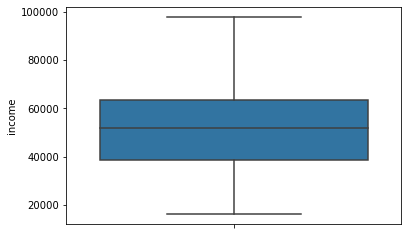

In [112]:
sns.boxplot(y=df.income)

In [113]:
#since there is outlier in income replace with median
df.income.fillna(df['income'].median(), inplace = True)

In [114]:
df.isna().sum()

age                  0
income               0
gender               0
department           0
grade                0
performance_score    0
dtype: int64

#### 8. Check the outliers and handle outliers in performance score using Percentiles.


<AxesSubplot:ylabel='performance_score'>

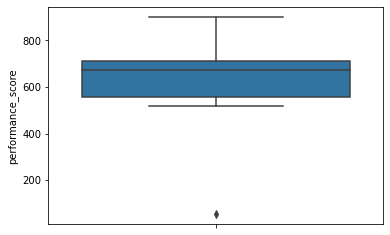

In [115]:
# plotting a boxplot to detect the presence of outliers
sns.boxplot(y=df.performance_score)

In [116]:
#there is an outlier presentin performance_score and we will handle it using IQR
Q1=np.percentile(df['performance_score'],25,interpolation='midpoint')
Q2=np.percentile(df['performance_score'],50,interpolation='midpoint')
Q3=np.percentile(df['performance_score'],75,interpolation='midpoint')
IQR=Q3-Q1
lowlmt=Q1-1.5*IQR
uplmt=Q3+1.5*IQR
#find outlier
outlier = []
for x in df['performance_score']:
    if (x > uplmt) or (x < lowlmt):
        outlier.append(x)
print(outlier)

[53]


In [117]:
#locate the indexes of outliers

index1 = (df['performance_score']<lowlmt)
index1 = df.loc[index1].index


In [118]:
#outlier
df.loc[index1]

,age,income,gender,department,grade,performance_score
name,,,,,,
James Authur,54.0,52000.0,F,Operations,G3,53


In [119]:
df['performance_score'].median()

674.0

In [120]:
#replacing outlier with median
df.loc[list(index1),'performance_score']=df['performance_score'].median()
df

,age,income,gender,department,grade,performance_score
name,,,,,,
Allen Smith,45.0,52000.0,F,Operations,G3,723
S Kumar,45.0,16000.0,F,Finance,G0,520
Jack Morgan,32.0,35000.0,M,Finance,G2,674
Ying Chin,45.0,65000.0,F,Sales,G3,556
Dheeraj Patel,30.0,42000.0,F,Operations,G2,711
Satyam Sharma,45.0,62000.0,F,Sales,G3,649
James Authur,54.0,52000.0,F,Operations,G3,674
Josh Wills,54.0,52000.0,F,Finance,G3,901
Leo Duck,23.0,98000.0,M,Sales,G4,709


#### 9. Check the gender column and do Dummy encoding.


In [121]:
df['gender']

name
Allen Smith      F
S Kumar          F
Jack Morgan      M
Ying Chin        F
Dheeraj Patel    F
Satyam Sharma    F
James Authur     F
Josh Wills       F
Leo Duck         M
Name: gender, dtype: object

In [130]:
data=pd.get_dummies(df.gender)
data

,F,M
name,,
Allen Smith,1,0
S Kumar,1,0
Jack Morgan,0,1
Ying Chin,1,0
Dheeraj Patel,1,0
Satyam Sharma,1,0
James Authur,1,0
Josh Wills,1,0
Leo Duck,0,1


In [129]:
df_encoded = pd.get_dummies(df,columns=['gender'])
df_encoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,723,1,0
S Kumar,45.0,16000.0,Finance,G0,520,1,0
Jack Morgan,32.0,35000.0,Finance,G2,674,0,1
Ying Chin,45.0,65000.0,Sales,G3,556,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,711,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,649,1,0
James Authur,54.0,52000.0,Operations,G3,674,1,0
Josh Wills,54.0,52000.0,Finance,G3,901,1,0
Leo Duck,23.0,98000.0,Sales,G4,709,0,1


#### 10.Do the standard scaling on the feature performance score

In [137]:
from sklearn.preprocessing import StandardScaler

In [142]:
scale = StandardScaler()
scaled_data =scale.fit_transform(df_encoded[['performance_score']])
df_encoded['performance_score']=scaled_data
df_encoded

,age,income,department,grade,performance_score,gender_F,gender_M
name,,,,,,,
Allen Smith,45.0,52000.0,Operations,G3,0.422890,1,0
S Kumar,45.0,16000.0,Finance,G0,-1.558187,1,0
Jack Morgan,32.0,35000.0,Finance,G2,-0.055301,0,1
Ying Chin,45.0,65000.0,Sales,G3,-1.206863,1,0
Dheeraj Patel,30.0,42000.0,Operations,G2,0.305782,1,0
Satyam Sharma,45.0,62000.0,Sales,G3,-0.299276,1,0
James Authur,54.0,52000.0,Operations,G3,-0.055301,1,0
Josh Wills,54.0,52000.0,Finance,G3,2.159992,1,0
Leo Duck,23.0,98000.0,Sales,G4,0.286264,0,1
